In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telco Customer Churn Rate.csv to Telco Customer Churn Rate.csv


In [ ]:
df = pd.read_csv('Telco Customer Churn Rate.csv')

In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.duplicated().sum()

0

## **Exploratory Data Analysis**

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


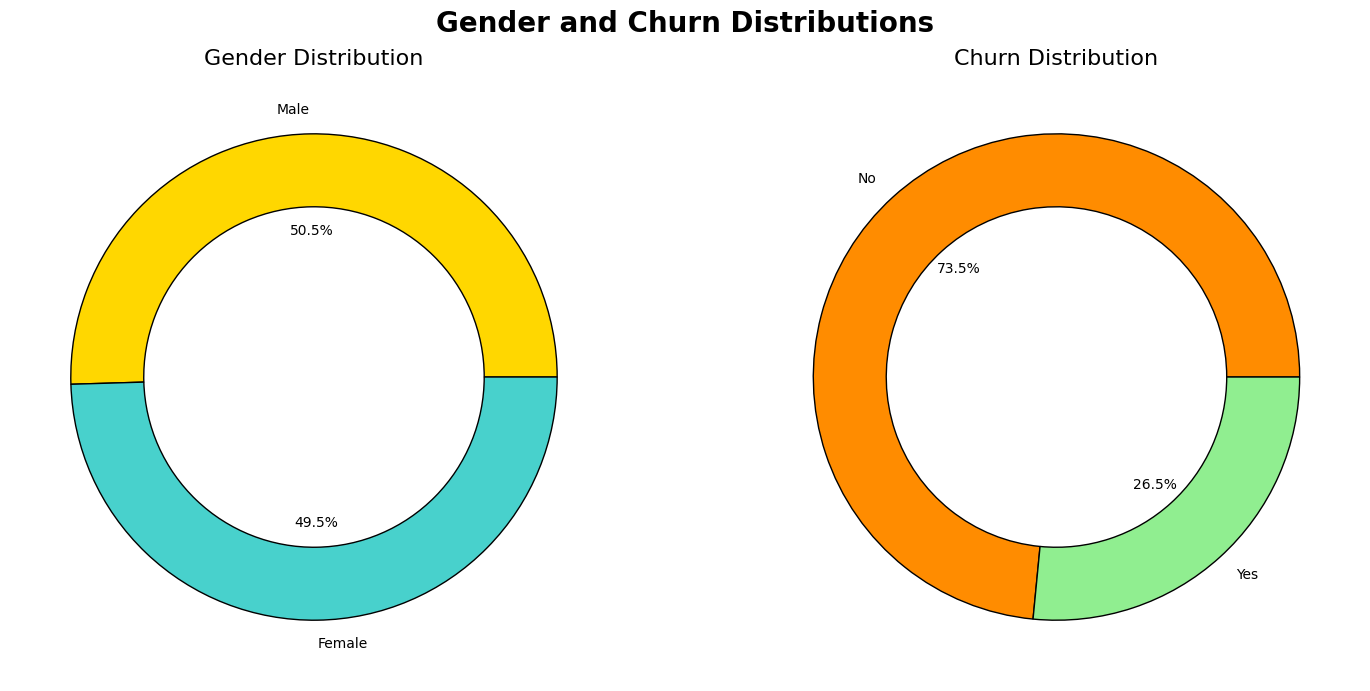

In [ ]:
import matplotlib.pyplot as plt

gender_counts = df['gender'].value_counts()
churn_counts = df['Churn'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=['gold', 'mediumturquoise'],
    wedgeprops=dict(width=0.3, edgecolor='black')
)
axes[0].set_title('Gender Distribution', fontsize=16)

axes[1].pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    colors=['darkorange', 'lightgreen'],
    wedgeprops=dict(width=0.3, edgecolor='black')
)
axes[1].set_title('Churn Distribution', fontsize=16)

plt.suptitle('Gender and Churn Distributions', fontsize=20, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

fig = px.sunburst(df, path=['Churn', 'gender'], title='<b>Sunburst Plot of Gender and Churn</b>')
fig.show()

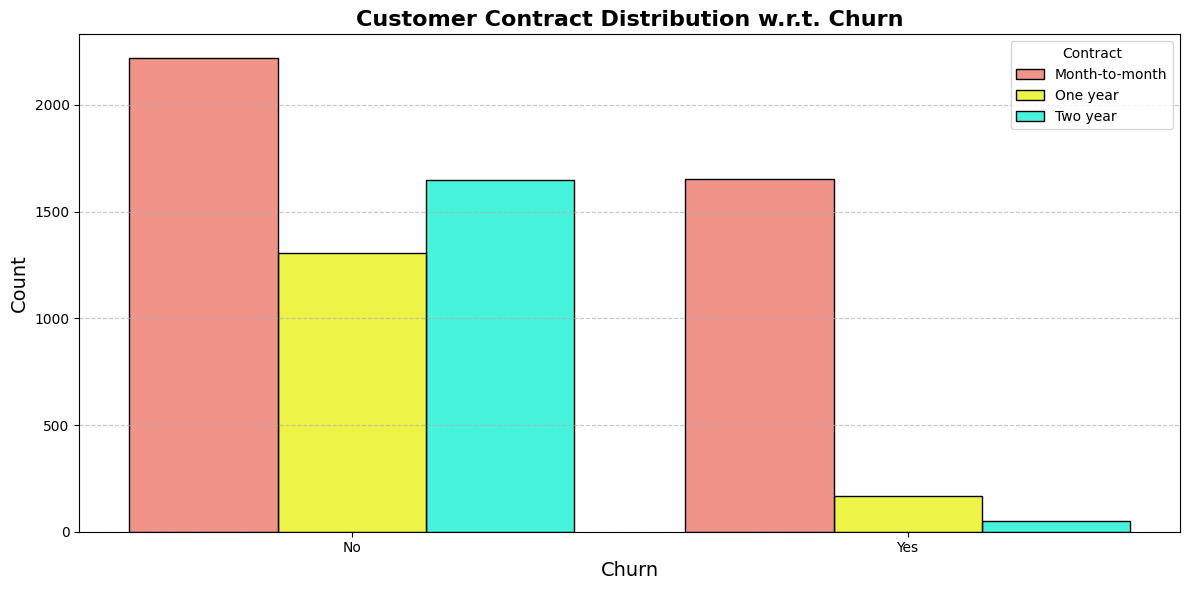

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='Churn', hue='Contract', multiple='dodge', shrink=0.8,
             palette=['#EC7063', '#E9F00B', '#0BF0D1'], binwidth=0.5)

plt.title('Customer Contract Distribution w.r.t. Churn', fontsize=16, weight='bold')
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

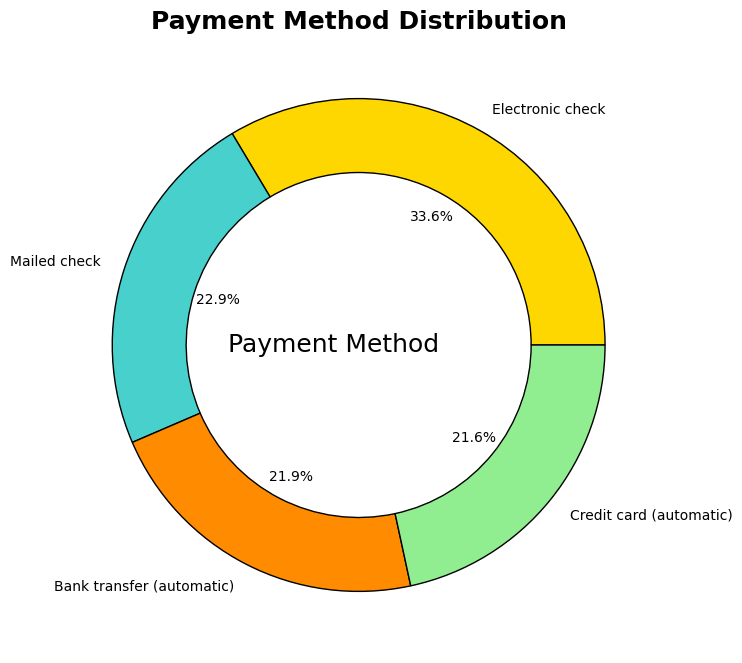

In [ ]:
payment_counts = df['PaymentMethod'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%',
        colors=['gold', 'mediumturquoise', 'darkorange', 'lightgreen'],
        wedgeprops=dict(width=0.3, edgecolor='black'))

plt.title('Payment Method Distribution', fontsize=18, weight='bold')
plt.text(-0.1, 0, 'Payment Method', fontsize=18, ha='center', va='center')

plt.show()

In [ ]:
female_churn_probability = df[(df["gender"] == "Female") & (df["Churn"] == "Yes")].shape[0] / df[df["gender"] == "Female"].shape[0] * 100
male_churn_probability = df[(df["gender"] == "Male") & (df["Churn"] == "Yes")].shape[0] / df[df["gender"] == "Male"].shape[0] * 100

print(f'A female customer has a probability of {round(female_churn_probability, 2)} % churn')
print(f'A male customer has a probability of {round(male_churn_probability, 2)} % churn')


A female customer has a probability of 26.92 % churn
A male customer has a probability of 26.16 % churn


In [ ]:
month_to_month_churn_probability = df[(df["Contract"] == "Month-to-month") & (df["Churn"] == "Yes")].shape[0] / df[df["Contract"] == "Month-to-month"].shape[0] * 100
one_year_churn_probability = df[(df["Contract"] == "One year") & (df["Churn"] == "Yes")].shape[0] / df[df["Contract"] == "One year"].shape[0] * 100
two_year_churn_probability = df[(df["Contract"] == "Two year") & (df["Churn"] == "Yes")].shape[0] / df[df["Contract"] == "Two year"].shape[0] * 100

print(f'A customer with month-to-month contract has a probability of {round(month_to_month_churn_probability, 2)} % churn')
print(f'A customer with one year contract has a probability of {round(one_year_churn_probability, 2)} % churn')
print(f'A customer with two year contract has a probability of {round(two_year_churn_probability, 2)} % churn')


A customer with month-to-month contract has a probability of 42.71 % churn
A customer with one year contract has a probability of 11.27 % churn
A customer with two year contract has a probability of 2.83 % churn


In [ ]:
churn_payment_counts = df.groupby(['Churn', 'PaymentMethod']).size().reset_index(name='count')

fig = make_subplots(rows=1, cols=1, specs=[[{'type':'bar'}]])

payment_methods = df['PaymentMethod'].unique()
colors = ['#EC7063', '#0BF0D1', '#E9F00B', '#5DADE2']

for i, payment_method in enumerate(payment_methods):
    churn_data = churn_payment_counts[churn_payment_counts['PaymentMethod'] == payment_method]
    fig.add_trace(go.Bar(
        x=churn_data['Churn'],
        y=churn_data['count'],
        name=payment_method,
        marker_color=colors[i]
    ))

fig.update_layout(
    title_text='<b>Payment Method Distribution w.r.t. Churn</b>',
    width=1100,
    height=500,
    bargap=0.3,
    barmode='group'
)

fig.update_traces(marker_line_width=2, marker_line_color='black')

fig.show()

In [ ]:
payment_methods = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

for method in payment_methods:
    churn_rate = round(
        (df[(df["PaymentMethod"] == method) & (df["Churn"] == "Yes")].shape[0] /
         df[df["PaymentMethod"] == method].shape[0]) * 100, 2
    )
    print(f'A customer that uses {method} for paying has a probability of {churn_rate} % churn')


A customer that uses Electronic check for paying has a probability of 45.29 % churn
A customer that uses Mailed check for paying has a probability of 19.11 % churn
A customer that uses Bank transfer (automatic) for paying has a probability of 16.71 % churn
A customer that uses Credit card (automatic) for paying has a probability of 15.24 % churn


In [ ]:
df[df['gender']=='Male'][['InternetService', 'Churn']].value_counts()
df[df['gender']=='Female'][['InternetService', 'Churn']].value_counts()

,,count
InternetService,Churn,
DSL,No,969
Fiber optic,No,889
No,No,691
Fiber optic,Yes,664
DSL,Yes,219
No,Yes,56


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ['Female', 'Male', 'Female', 'Male']],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ['Female', 'Male', 'Female', 'Male']],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ['Female', 'Male', 'Female', 'Male']],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text='<b>Churn Distribution w.r.t. Internet Service and Gender</b>')
fig.update_traces(marker_line_width=2,marker_line_color='black')

iplot(fig)

In [ ]:

fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

fig.add_trace(go.Pie(
    labels=df['Dependents'].unique(),
    values=df['Dependents'].value_counts(),
    name='Dependents',
    marker_colors=['#E5527A', '#AAB7B8']
), 1, 1)

fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

fig.update_layout(
    title_text='<b>Dependents Distribution</b>',
    annotations=[dict(text='Dependents', x=0.5, y=0.5, font_size=18, showarrow=False)]
)

fig.show()

In [ ]:
fig = px.histogram(
    df,
    x='Dependents',
    color='Churn',
    barmode='group',
    title='<b>Dependents Distribution w.r.t. Churn</b>',
    color_discrete_sequence=['#00CC96', '#FFA15A'],
    text_auto=True
)

fig.update_layout(width=1100, height=500, bargap=0.3)
fig.update_traces(marker_line_width=2, marker_line_color='black')

fig.show()

In [ ]:
# Calculate churn probability for customers with dependents
dependents_churn = df.groupby('Dependents').apply(lambda x: (x['Churn'] == 'Yes').mean()).loc['Yes'] * 100

# Calculate churn probability for customers without dependents
no_dependents_churn = df.groupby('Dependents').apply(lambda x: (x['Churn'] == 'Yes').mean()).loc['No'] * 100

print(f'A customer with dependents has a probability of {round(dependents_churn, 2)} % churn')
print(f'A customer without dependents has a probability of {round(no_dependents_churn, 2)} % churn')


A customer with dependents has a probability of 15.45 % churn
A customer without dependents has a probability of 31.28 % churn


<ipython-input-25-ea6d59e98346>:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-25-ea6d59e98346>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
fig = px.pie(df, names='Partner', title='<b>Partner Distribution<b>',
             color='Partner', color_discrete_map={'Yes': 'gold', 'No': 'purple'})

# Update the layout for better presentation
fig.update_traces(textfont_size=20, marker=dict(line=dict(color='black', width=2)))
fig.update_layout(title_text='<b>Partner Distribution</b>',
                  annotations=[dict(text='Partner', x=0.5, y=0.5, font_size=18, showarrow=False)])

fig.show()

In [ ]:
fig = px.pie(df, names='SeniorCitizen', title='<b>Senior Citizen Distribution<b>',
             color='SeniorCitizen', color_discrete_map={0: '#56E11A', 1: '#1A87E1'},
             labels={'SeniorCitizen': 'Senior Citizen'},
             hole=0.5)

fig.update_traces(textfont_size=20, marker=dict(line=dict(color='black', width=2)))
fig.update_layout(title_text='<b>Senior Citizen Distribution</b>',
                  annotations=[dict(text='Senior Citizen', x=0.5, y=0.5, font_size=18, showarrow=False)])

fig.show()

In [ ]:
fig = px.pie(df, names='PhoneService', title='<b>Phone Service Distribution<b>',
             color='PhoneService', color_discrete_map={'No': 'LightSalmon', 'Yes': '#7FB3D5'},
             labels={'PhoneService': 'Phone Service'},
             hole=0.5)

# Update the layout for better presentation
fig.update_traces(textfont_size=20, marker=dict(line=dict(color='black', width=2)))
fig.update_layout(title_text='<b>Phone Service Distribution</b>',
                  annotations=[dict(text='Phone Service', x=0.5, y=0.5, font_size=20, showarrow=False)])

fig.show()

# **Detecting Outliers**

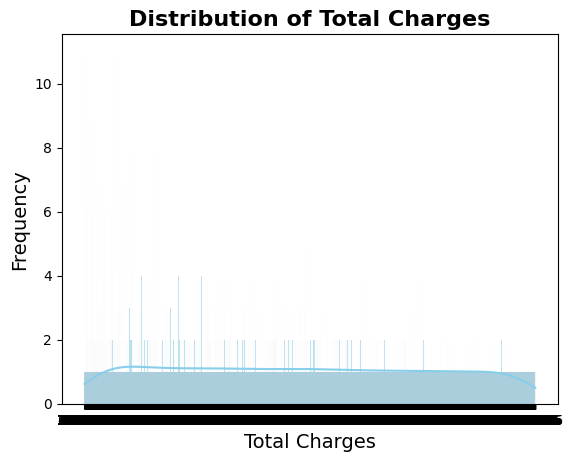

In [ ]:
sns.histplot(df['TotalCharges'], kde=True, color='skyblue', bins=30)

plt.title('Distribution of Total Charges', fontsize=16, weight='bold')
plt.xlabel('Total Charges', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

In [ ]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=df['MonthlyCharges'], notched=True, name='Monthly Charges', marker_color = '#6699ff',
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.add_trace(go.Box(y=df['TotalCharges'], notched=True, name='Total Charges', marker_color = '#ff0066',
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 1)

fig.add_trace(go.Box(y=df['tenure'], notched=True, name='Tenure', marker_color = 'lightseagreen',
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 3)

fig.update_layout(title_text='<b>Box Plots for Numerical Variables<b>')

iplot(fig)


In [ ]:
categorical = df.select_dtypes(include=['object']).columns
for var in categorical:
    print(df[var].value_counts(normalize=True))
    print()
    print()

gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64


Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64


Dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64


PhoneService
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64


MultipleLines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64


InternetService
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64


OnlineSecurity
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: proportion, dtype: float64


OnlineBackup
No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: proportion, dtype: float64


DeviceProtection
No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: proportion, dtype: 

In [ ]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

In [ ]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']

In [ ]:
def category(df):
    categorical = df.select_dtypes(include='object').columns
    for var in categorical:
        ordered_labels = df.groupby([var])['Churn'].mean().sort_values().index

        ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)}
        df[var] = df[var].map(ordinal_label)

category(df)

In [ ]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,0,0,1,2,1,2,2,2,2,2,1,3,29.85,4787,0
1,0,0,1,1,34,1,1,1,1,2,1,2,2,2,1,0,2,56.95,3447,0
2,0,0,1,1,2,1,1,1,1,1,2,2,2,2,2,1,2,53.85,5631,1
3,0,0,1,1,45,0,0,1,1,2,1,1,2,2,1,0,1,42.30,3292,0
4,1,0,1,1,2,1,1,2,2,2,2,2,2,2,2,1,3,70.70,5889,1


In [ ]:
fig = px.bar(x=df['Churn'].unique()[::-1], y=[df[df['Churn']==1].count()[0], df[df['Churn']==0].count()[0]],
             text=[np.round(df[df['Churn']==1].count()[0]/df.shape[0], 4), np.round(df[df['Churn']==0].count()[0]/df.shape[0], 4)],
             color_discrete_sequence=['#ff9999'])

fig.update_layout(title_text='<b>Churn Count Plot<b>', xaxis=dict(tickmode='linear', tick0=0, dtick=1),
                  width=700, height=400, bargap=0.4)

fig.update_layout({'yaxis': {'title': 'Count'}, 'xaxis': {'title': 'Churn'}})

iplot(fig)

<ipython-input-48-e1e549bb6241>:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-48-e1e549bb6241>:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-48-e1e549bb6241>:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-48-e1e549bb6241>:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wi

In [ ]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The BorderlineSMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



## **Splitting the dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((9313, 19), (1035, 19))

In [ ]:
scaler = StandardScaler()
X_train[['TotalCharges','MonthlyCharges','tenure']] = scaler.fit_transform(X_train[['TotalCharges','MonthlyCharges','tenure']])
X_test[['TotalCharges','MonthlyCharges','tenure']] = scaler.transform(X_test[['TotalCharges','MonthlyCharges','tenure']])

In [ ]:
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

## **Model and Parameter Optimisation**

**Logistic Regression**

In [ ]:
LR_S = LogisticRegression(random_state = 42)
params_LR = {'C': list(np.arange(1,12)), 'penalty': ['l2', 'elasticnet', 'none'], 'class_weight': ['balanced','None']}
grid_LR = RandomizedSearchCV(LR_S, param_distributions=params_LR, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_LR.fit(X_train, y_train)
print('Best parameters:', grid_LR.best_estimator_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


80 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

Best parameters: LogisticRegression(C=10, class_weight='balanced', random_state=42)


In [ ]:
LR = LogisticRegression(random_state = 42, penalty= 'l2', class_weight= 'balanced', C=6)
cross_val_LR_Acc = cross_val_score(LR, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_LR_f1 = cross_val_score(LR, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_LR_AUC = cross_val_score(LR, X_train, y_train, cv = CV, scoring = 'roc_auc')

###**Random Forest**

In [ ]:
RF_S = RandomForestClassifier(random_state=42)
params_RF = {'n_estimators': list(range(50, 100)), 'min_samples_leaf': list(range(1, 5)), 'min_samples_split': list(range(1, 5))}
grid_RF = RandomizedSearchCV(RF_S, param_distributions=params_RF, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_RF.fit(X_train, y_train)
print('Best parameters:', grid_RF.best_estimator_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

Best parameters: RandomForestClassifier(min_samples_leaf=2, min_samples_split=3, n_estimators=96,
                       random_state=42)


In [ ]:
RF = RandomForestClassifier(n_estimators=70, random_state=42)
cross_val_RF_Acc = cross_val_score(RF, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_RF_f1 = cross_val_score(RF, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_RF_AUC = cross_val_score(RF, X_train, y_train, cv = CV, scoring = 'roc_auc')

### **Decision Tree**

In [ ]:
DT_S = DecisionTreeClassifier(random_state=42)
params_DT = {'min_samples_leaf': list(range(1,6)), 'min_samples_split': list(range(1,6))}
grid_DT = RandomizedSearchCV(DT_S, param_distributions=params_DT, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_DT.fit(X_train, y_train)
print('Best parameters:', grid_DT.best_estimator_)

Best parameters: DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=4, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

In [ ]:
DT = DecisionTreeClassifier(random_state=42)
cross_val_DT_Acc = cross_val_score(DT, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_DT_f1 = cross_val_score(DT, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_DT_AUC = cross_val_score(DT, X_train, y_train, cv = CV, scoring = 'roc_auc')

### **Ada Boost**

In [ ]:
AB_S = AdaBoostClassifier(random_state=42)
params_AB = {'n_estimators': list(np.arange(50, 100, 10)), 'learning_rate': [0.01, 0.1, 1]}
grid_AB = RandomizedSearchCV(AB_S, param_distributions=params_AB, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_AB.fit(X_train, y_train)
print('Best parameters:', grid_AB.best_estimator_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.



Best parameters: AdaBoostClassifier(learning_rate=1, n_estimators=90, random_state=42)


In [ ]:
AB = AdaBoostClassifier(learning_rate=1, n_estimators=90, random_state=42)
cross_val_AB_Acc = cross_val_score(AB, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_AB_f1 = cross_val_score(AB, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_AB_AUC = cross_val_score(AB, X_train, y_train, cv = CV, scoring = 'roc_auc')

### **KNN**

In [ ]:
KNN_S = KNeighborsClassifier()
params_KNN = {'n_neighbors': list(range(1,20))}
grid_KNN = RandomizedSearchCV(KNN_S, param_distributions=params_KNN, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_KNN.fit(X_train, y_train)
print('Best parameters:', grid_KNN.best_estimator_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 19 is smaller than n_iter=20. Running 19 iterations. For exhaustive searches, use GridSearchCV.



Best parameters: KNeighborsClassifier(n_neighbors=6)


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=1)
cross_val_KNN_Acc = cross_val_score(KNN, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_KNN_f1 = cross_val_score(KNN, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_KNN_AUC = cross_val_score(KNN, X_train, y_train, cv = CV, scoring = 'roc_auc')

In [ ]:
RF_I = RandomForestClassifier(n_estimators=70, random_state=42)
RF_I.fit(X, y)

RandomForestClassifier(n_estimators=70, random_state=42)

In [ ]:
d = {'Features': X_train.columns, 'Feature Importance': RF_I.feature_importances_}
df_feature_importance = pd.DataFrame(d)
df_sorted = df_feature_importance.sort_values(by='Feature Importance', ascending=True)
df_sorted
df_sorted.style.background_gradient(cmap='Blues')


,Features,Feature Importance
1,SeniorCitizen,0.002121
5,PhoneService,0.002297
10,DeviceProtection,0.003482
3,Dependents,0.003655
13,StreamingMovies,0.003831
9,OnlineBackup,0.003989
7,InternetService,0.004710
12,StreamingTV,0.004803
15,PaperlessBilling,0.004856
11,TechSupport,0.005532


In [ ]:
fig = px.bar(x=df_sorted['Feature Importance'], y=df_sorted['Features'], color_continuous_scale=px.colors.sequential.Blues,
             title='<b>Feature Importance Based on Random Forest<b>', text_auto='.4f', color=df_sorted['Feature Importance'])

fig.update_traces(marker=dict(line=dict(color='black', width=2)))
fig.update_layout({'yaxis': {'title':'Features'}, 'xaxis': {'title':'Feature Importance'}})

iplot(fig)


### **Results**

In [ ]:
compare_models = [('Logistic Regression', cross_val_LR_Acc.mean(), cross_val_LR_f1.mean(), cross_val_LR_AUC.mean(), ''),
                  ('Random Forest', cross_val_RF_Acc.mean(), cross_val_RF_f1.mean(), cross_val_RF_AUC.mean(), ''),
                  ('KNN', cross_val_KNN_Acc.mean(), cross_val_KNN_f1.mean(), cross_val_KNN_AUC.mean(), ''),
                  ('Decision Tree', cross_val_DT_Acc.mean(), cross_val_DT_f1.mean(), cross_val_DT_AUC.mean(), ''),
                  ('Ada Boost', cross_val_AB_Acc.mean(), cross_val_AB_f1.mean(), cross_val_AB_AUC.mean(), '')]


In [ ]:
compare = pd.DataFrame(data = compare_models, columns=['Model','Accuracy Mean', 'F1 Score Mean', 'AUC Score Mean', 'Description'])
compare.style.background_gradient(cmap='YlGn')

,Model,Accuracy Mean,F1 Score Mean,AUC Score Mean,Description
0,Logistic Regression,0.975839,0.976295,0.990839,
1,Random Forest,0.982819,0.982990,0.995353,
2,KNN,0.940836,0.941392,0.940867,
3,Decision Tree,0.980135,0.980137,0.981270,
4,Ada Boost,0.979491,0.979863,0.991575,


In [ ]:
d1 = {'Logistic Regression': cross_val_LR_Acc,
      'Random Forest': cross_val_RF_Acc,
      'KNN': cross_val_KNN_Acc,
      'Decision Tree': cross_val_DT_Acc,
      'Ada Boost': cross_val_AB_Acc}

d_accuracy = pd.DataFrame(data=d1)


In [ ]:
d2 = {'Logistic Regression': cross_val_LR_f1,
      'Random Forest': cross_val_RF_f1,
      'KNN': cross_val_KNN_f1,
      'Decision Tree': cross_val_DT_f1,
      'Ada Boost': cross_val_AB_f1}

d_f1 = pd.DataFrame(data=d2)

In [ ]:
d3 = {'Logistic Regression': cross_val_LR_AUC,
      'Random Forest': cross_val_RF_AUC,
      'KNN': cross_val_KNN_AUC,
      'Decision Tree': cross_val_DT_AUC,
      'Ada Boost': cross_val_AB_AUC}

d_auc = pd.DataFrame(data=d3)


In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(name='Logistic Regression', y=d_accuracy['Logistic Regression']))
fig.add_trace(go.Box(name='Random Forest', y=d_accuracy['Random Forest']))
fig.add_trace(go.Box(name='KNN', y=d_accuracy['KNN']))
fig.add_trace(go.Box(name='Decision Tree', y=d_accuracy['Decision Tree']))
fig.add_trace(go.Box(name='Ada Boost', y=d_accuracy['Ada Boost']))

fig.update_traces(boxpoints='all', boxmean=True)

fig.update_layout(title_text='<b>Box Plots for Models Accuracy (train)<b>')

iplot(fig)


In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(name='Logistic Regression', y=d_f1['Logistic Regression']))
fig.add_trace(go.Box(name='Random Forest', y=d_f1['Random Forest']))
fig.add_trace(go.Box(name='KNN', y=d_f1['KNN']))
fig.add_trace(go.Box(name='Decision Tree', y=d_f1['Decision Tree']))
fig.add_trace(go.Box(name='Ada Boost', y=d_f1['Ada Boost']))

fig.update_traces(boxpoints='all', boxmean=True)

fig.update_layout(title_text='<b>Box Plots for Models F1 Score (train)<b>')

iplot(fig)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(name='Logistic Regression', y=d_auc['Logistic Regression']))
fig.add_trace(go.Box(name='Random Forest', y=d_auc['Random Forest']))
fig.add_trace(go.Box(name='KNN', y=d_auc['KNN']))
fig.add_trace(go.Box(name='Decision Tree', y=d_auc['Decision Tree']))
fig.add_trace(go.Box(name='Ada Boost', y=d_auc['Ada Boost']))

fig.update_traces(boxpoints='all', boxmean=True)

fig.update_layout(title_text='<b>Box Plots for Models AUC (train)<b>')

iplot(fig)


In [ ]:
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       505
           1       0.97      1.00      0.99       530

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035

